In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import gc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
def count_na(df) : 
    mask = df.isna().sum() > 0
    missing_values = df.isna().sum().sort_values(ascending=False)[mask]
    display(missing_values)
    
def count_na_percentage(df) : 
    mask = df.isna().sum() > 0
    missing_values_percentage = df.isna().sum().sort_values(ascending=False)[mask]/len(df)*100
    display(missing_values_percentage)

# Lecture des données

In [3]:
data=pd.read_excel('./donneeSite.xlsx', index_col="Ville")
data.head(3)

,Insee,Code_postal,Nb_habitants,Superficie,Pop_densite,Pop_active,Taux_chomage,Revenu_moyen,Prix_moyen,Note_global,...,Pharmacie,Maternelle,Primaire,Collège,Lycée,Securite,Education,Loisir / Sport,Environnement,Pratique
Ville,,,,,,,,,,,,,,,,,,,,,
L'Abergement-Clémenciat,1001,1400,767,16 km²,48 h/km²,49%,4.3%,22 228 €/an,1 938 €,NaN,...,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN
L'Abergement-de-Varey,1002,1640,241,9 km²,27 h/km²,50.6%,4.1%,22 883 €/an,1 130 €,NaN,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
Ambérieu-en-Bugey,1004,1500,14 127,25 km²,565 h/km²,47.5%,7.5%,19 735 €/an,2 005 €,3.8,...,6,5,4,2,2,4.0,3.8,3.8,4.0,3.3


In [4]:
data = data.drop(labels=["Securite", "Education","Loisir / Sport","Environnement","Pratique","Note_global","Code_postal","Insee"], axis=1)

In [5]:
data.dtypes

Nb_habitants                object
Superficie                  object
Pop_densite                 object
Pop_active                  object
Taux_chomage                object
Revenu_moyen                object
Prix_moyen                  object
Agriculteurs                 int64
Artisants/Commercants        int64
Cadres                       int64
Profession intermédiaire     int64
Employes                     int64
Ouvriers                     int64
Retraites                    int64
Sans emploie                 int64
0-14 ans                     int64
15-29 ans                    int64
30-44 ans                    int64
45-59 ans                    int64
60-74 ans                    int64
75-89 ans                    int64
90+ ans                      int64
Hypermarché                  int64
Supermarché                  int64
Boulangerie                  int64
Boucherie                    int64
Station service              int64
Banque                       int64
La poste            

In [6]:
data["Nb_habitants"] = data["Nb_habitants"].astype(str).str.replace('\s+', '').astype(int)

In [7]:
data

,Nb_habitants,Superficie,Pop_densite,Pop_active,Taux_chomage,Revenu_moyen,Prix_moyen,Agriculteurs,Artisants/Commercants,Cadres,...,Coiffeur,Vétérinaire,Restaurant,Médecin,Dentiste,Pharmacie,Maternelle,Primaire,Collège,Lycée
Ville,,,,,,,,,,,,,,,,,,,,,
L'Abergement-Clémenciat,767,16 km²,48 h/km²,49%,4.3%,22 228 €/an,1 938 €,2,3,10,...,0,0,1,0,0,0,1,1,0,0
L'Abergement-de-Varey,241,9 km²,27 h/km²,50.6%,4.1%,22 883 €/an,1 130 €,0,9,7,...,0,0,0,0,0,0,0,0,0,0
Ambérieu-en-Bugey,14127,25 km²,565 h/km²,47.5%,7.5%,19 735 €/an,2 005 €,0,2,6,...,23,2,38,176,15,6,5,4,2,2
Ambérieux-en-Dombes,1619,16 km²,101 h/km²,51.8%,4.1%,23 183 €/an,2 442 €,0,7,7,...,1,0,6,2,0,1,1,1,0,0
Ambléon,109,6 km²,18 h/km²,52.3%,7.3%,NC,1 155 €,0,0,5,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villers-en-Arthies,508,8 km²,64 h/km²,51%,4.1%,26 675 €/an,2 150 €,0,4,6,...,0,0,0,0,0,0,0,1,0,0
Villiers-Adam,851,10 km²,85 h/km²,47.7%,4.1%,28 405 €/an,3 343 €,0,4,18,...,1,0,0,0,0,0,1,1,0,0
Villiers-le-Bel,27564,7 km²,3 938 h/km²,43.9%,9.6%,14 323 €/an,2 449 €,0,2,3,...,20,2,68,35,19,9,12,12,5,2


In [8]:
data["Superficie"] = data["Superficie"].astype(str).str.replace('km²', '').astype(int)

In [9]:
data["Pop_densite"] = data["Pop_densite"].astype(str).str.replace('\s+', '').str.replace('h/km²', '').astype(int)

In [10]:
data["Pop_active"] = data["Pop_active"].astype(str).str.replace('%', '').astype(float)

In [11]:
data["Taux_chomage"] = data["Taux_chomage"].astype(str).str.replace('%', '').astype(float)

In [12]:
data["Revenu_moyen"] = data["Revenu_moyen"].astype(str).str.replace('\s+', '').str.replace('€/an', '')
data["Revenu_moyen"] = data["Revenu_moyen"].replace('NC',np.nan).astype(float)

In [13]:
data["Prix_moyen"] = data["Prix_moyen"].astype(str).str.replace('\s+', '').str.replace('€', '').replace('NC',np.nan).astype(float)

In [14]:
data["Revenu_moyen"] = data["Revenu_moyen"].fillna(value=data["Revenu_moyen"].median())

In [15]:
data["Prix_moyen"] = data["Prix_moyen"].fillna(value=data["Prix_moyen"].median())


# X


In [16]:
X = data.iloc[:,:].values
labels = data.index

In [17]:
SS = StandardScaler()
SS.fit(X)
Xnorm = SS.transform(X)

In [18]:
Xnorm[0,:]

array([-0.12724987,  0.03537153, -0.15741575,  0.48304514, -0.33546131,
        0.57172304,  0.47463783, -0.15337022, -0.16933455,  1.23688662,
        0.36738385,  0.10344826,  0.67036171, -0.69616759, -1.18103249,
        0.70578147, -0.08055015, -0.20531266,  0.82360153, -0.47628639,
       -0.45102466, -0.12693356, -0.17810873, -0.2177246 , -0.0451211 ,
       -0.20377779, -0.28801443, -0.16898073, -0.31883821, -0.20785758,
       -0.24522469, -0.11373812, -0.09579213, -0.12293785, -0.19330865,
       -0.01129824,  0.00151269, -0.21286896, -0.12995057])

In [19]:
pca=PCA(n_components=0.9)
pca.fit(Xnorm)

PCA(n_components=0.9)

In [20]:
pca.explained_variance_

array([15.78222917,  5.01031013,  2.23258434,  1.41837119,  1.35723133,
        1.13527136,  1.0492897 ,  1.00014118,  0.90490255,  0.8599322 ,
        0.84670564,  0.77516841,  0.6762646 ,  0.65504486,  0.58568438,
        0.56215806,  0.50796514])

In [21]:
pca.explained_variance_ratio_

array([0.40466052, 0.12846567, 0.05724405, 0.03636741, 0.03479977,
       0.02910866, 0.02690406, 0.02564388, 0.02320194, 0.02204889,
       0.02170976, 0.01987552, 0.0173396 , 0.01679552, 0.0150171 ,
       0.01441388, 0.01302436])

In [22]:
pca.components_

array([[ 0.24602701,  0.05116097,  0.12633587, -0.00723028,  0.04446222,
        -0.0017062 ,  0.05818091, -0.03236129, -0.01162522,  0.03272661,
         0.00607518,  0.01207232, -0.01592794, -0.01560716,  0.04325849,
         0.00464433,  0.06859484,  0.0071597 , -0.03124333, -0.02910343,
         0.00033104,  0.01608642,  0.17015874,  0.22881404,  0.24519637,
         0.23686832,  0.21089636,  0.2415055 ,  0.22762647,  0.24596871,
         0.21081263,  0.23388721,  0.22625727,  0.2344127 ,  0.24689058,
         0.23928537,  0.24152368,  0.237519  ,  0.2300175 ],
       [-0.00952094,  0.10814093, -0.06533373, -0.34169577,  0.03426068,
        -0.22039922, -0.15195093,  0.11685533,  0.02236905, -0.17523638,
        -0.23308636, -0.12796718, -0.07010376,  0.3466042 , -0.01734705,
        -0.32507188, -0.23817584, -0.32906211, -0.05719938,  0.3161261 ,
         0.35273504,  0.22421838,  0.01609015,  0.01367778,  0.016159  ,
         0.01998066,  0.02687907,  0.01700328,  0.02724909,  0.

In [23]:
pca.components_[0,:]

array([ 0.24602701,  0.05116097,  0.12633587, -0.00723028,  0.04446222,
       -0.0017062 ,  0.05818091, -0.03236129, -0.01162522,  0.03272661,
        0.00607518,  0.01207232, -0.01592794, -0.01560716,  0.04325849,
        0.00464433,  0.06859484,  0.0071597 , -0.03124333, -0.02910343,
        0.00033104,  0.01608642,  0.17015874,  0.22881404,  0.24519637,
        0.23686832,  0.21089636,  0.2415055 ,  0.22762647,  0.24596871,
        0.21081263,  0.23388721,  0.22625727,  0.2344127 ,  0.24689058,
        0.23928537,  0.24152368,  0.237519  ,  0.2300175 ])

In [24]:
pca.components_[1,:]

array([-0.00952094,  0.10814093, -0.06533373, -0.34169577,  0.03426068,
       -0.22039922, -0.15195093,  0.11685533,  0.02236905, -0.17523638,
       -0.23308636, -0.12796718, -0.07010376,  0.3466042 , -0.01734705,
       -0.32507188, -0.23817584, -0.32906211, -0.05719938,  0.3161261 ,
        0.35273504,  0.22421838,  0.01609015,  0.01367778,  0.016159  ,
        0.01998066,  0.02687907,  0.01700328,  0.02724909,  0.01034383,
        0.02146767,  0.01285821,  0.01147439,  0.00540885,  0.01311194,
       -0.01015084, -0.01142542,  0.01886239,  0.01824995])

# Cercle de corrélation

Text(0.5, 1.0, 'Circle of Correlations')

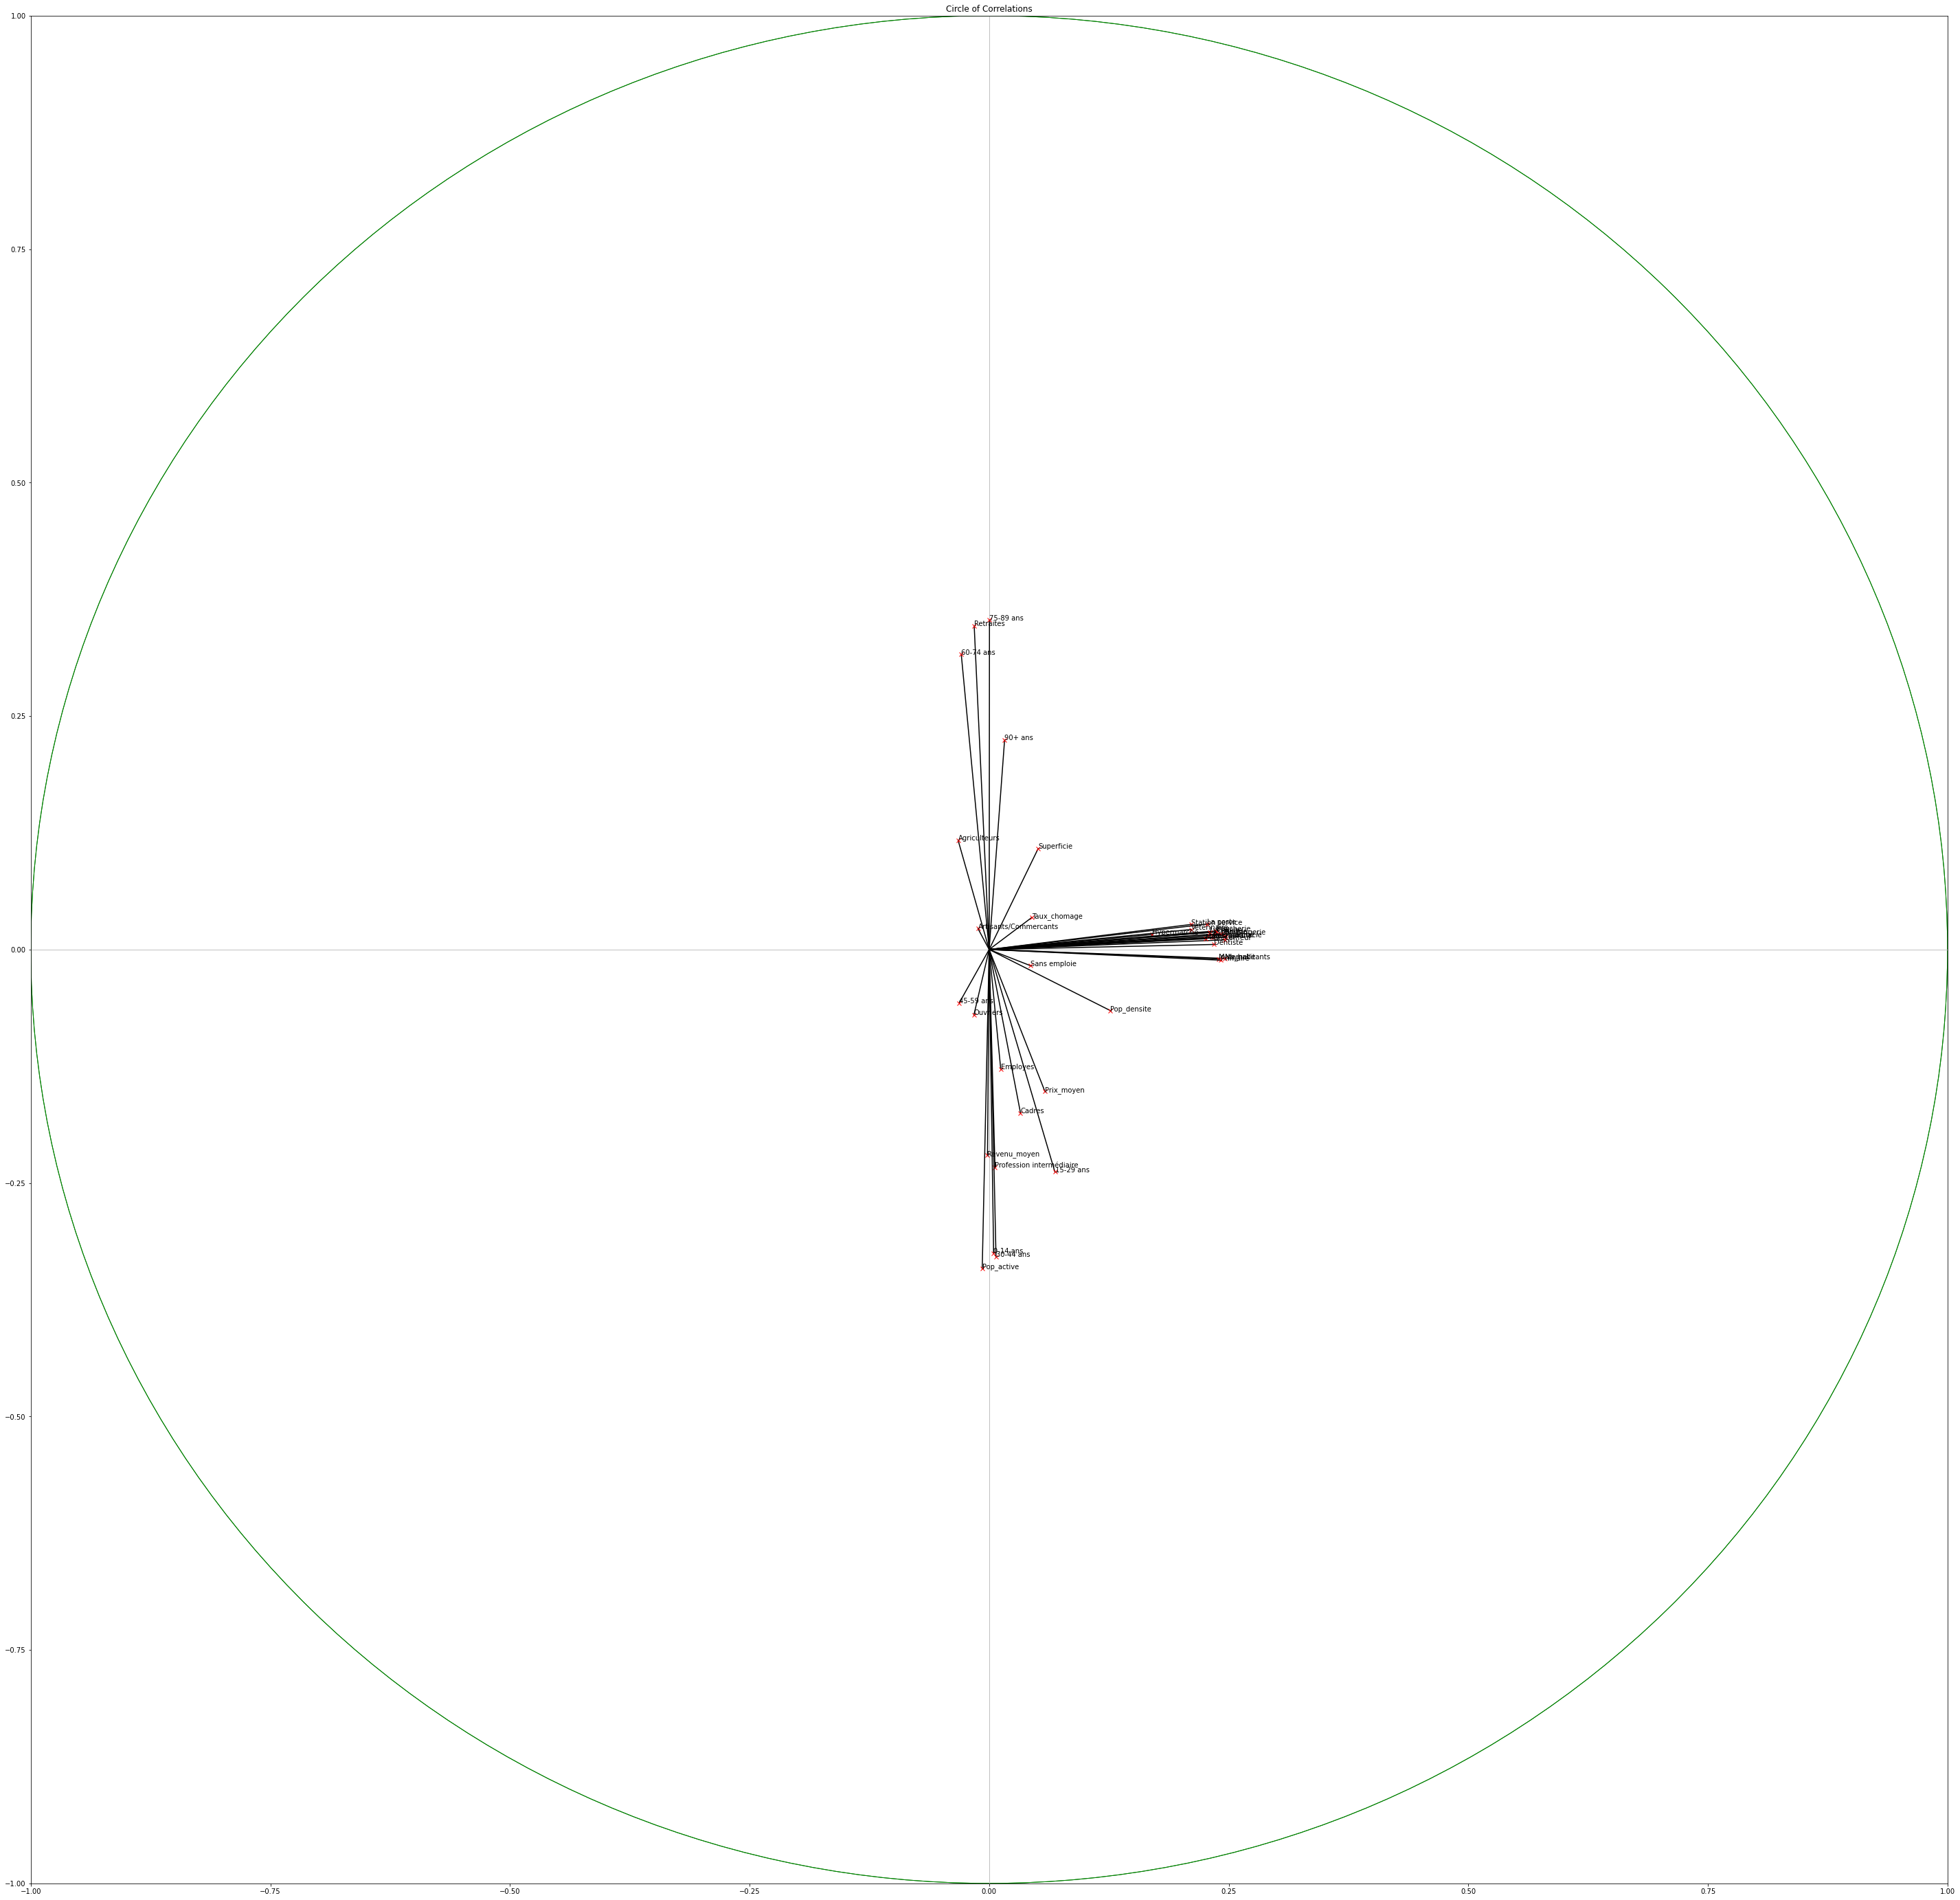

In [28]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(17)]

pc_infos = pd.DataFrame(coef, columns=cols, index=data.iloc[:,:].columns)


plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(50,50))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")

In [26]:
X_pca=pca.transform(Xnorm)

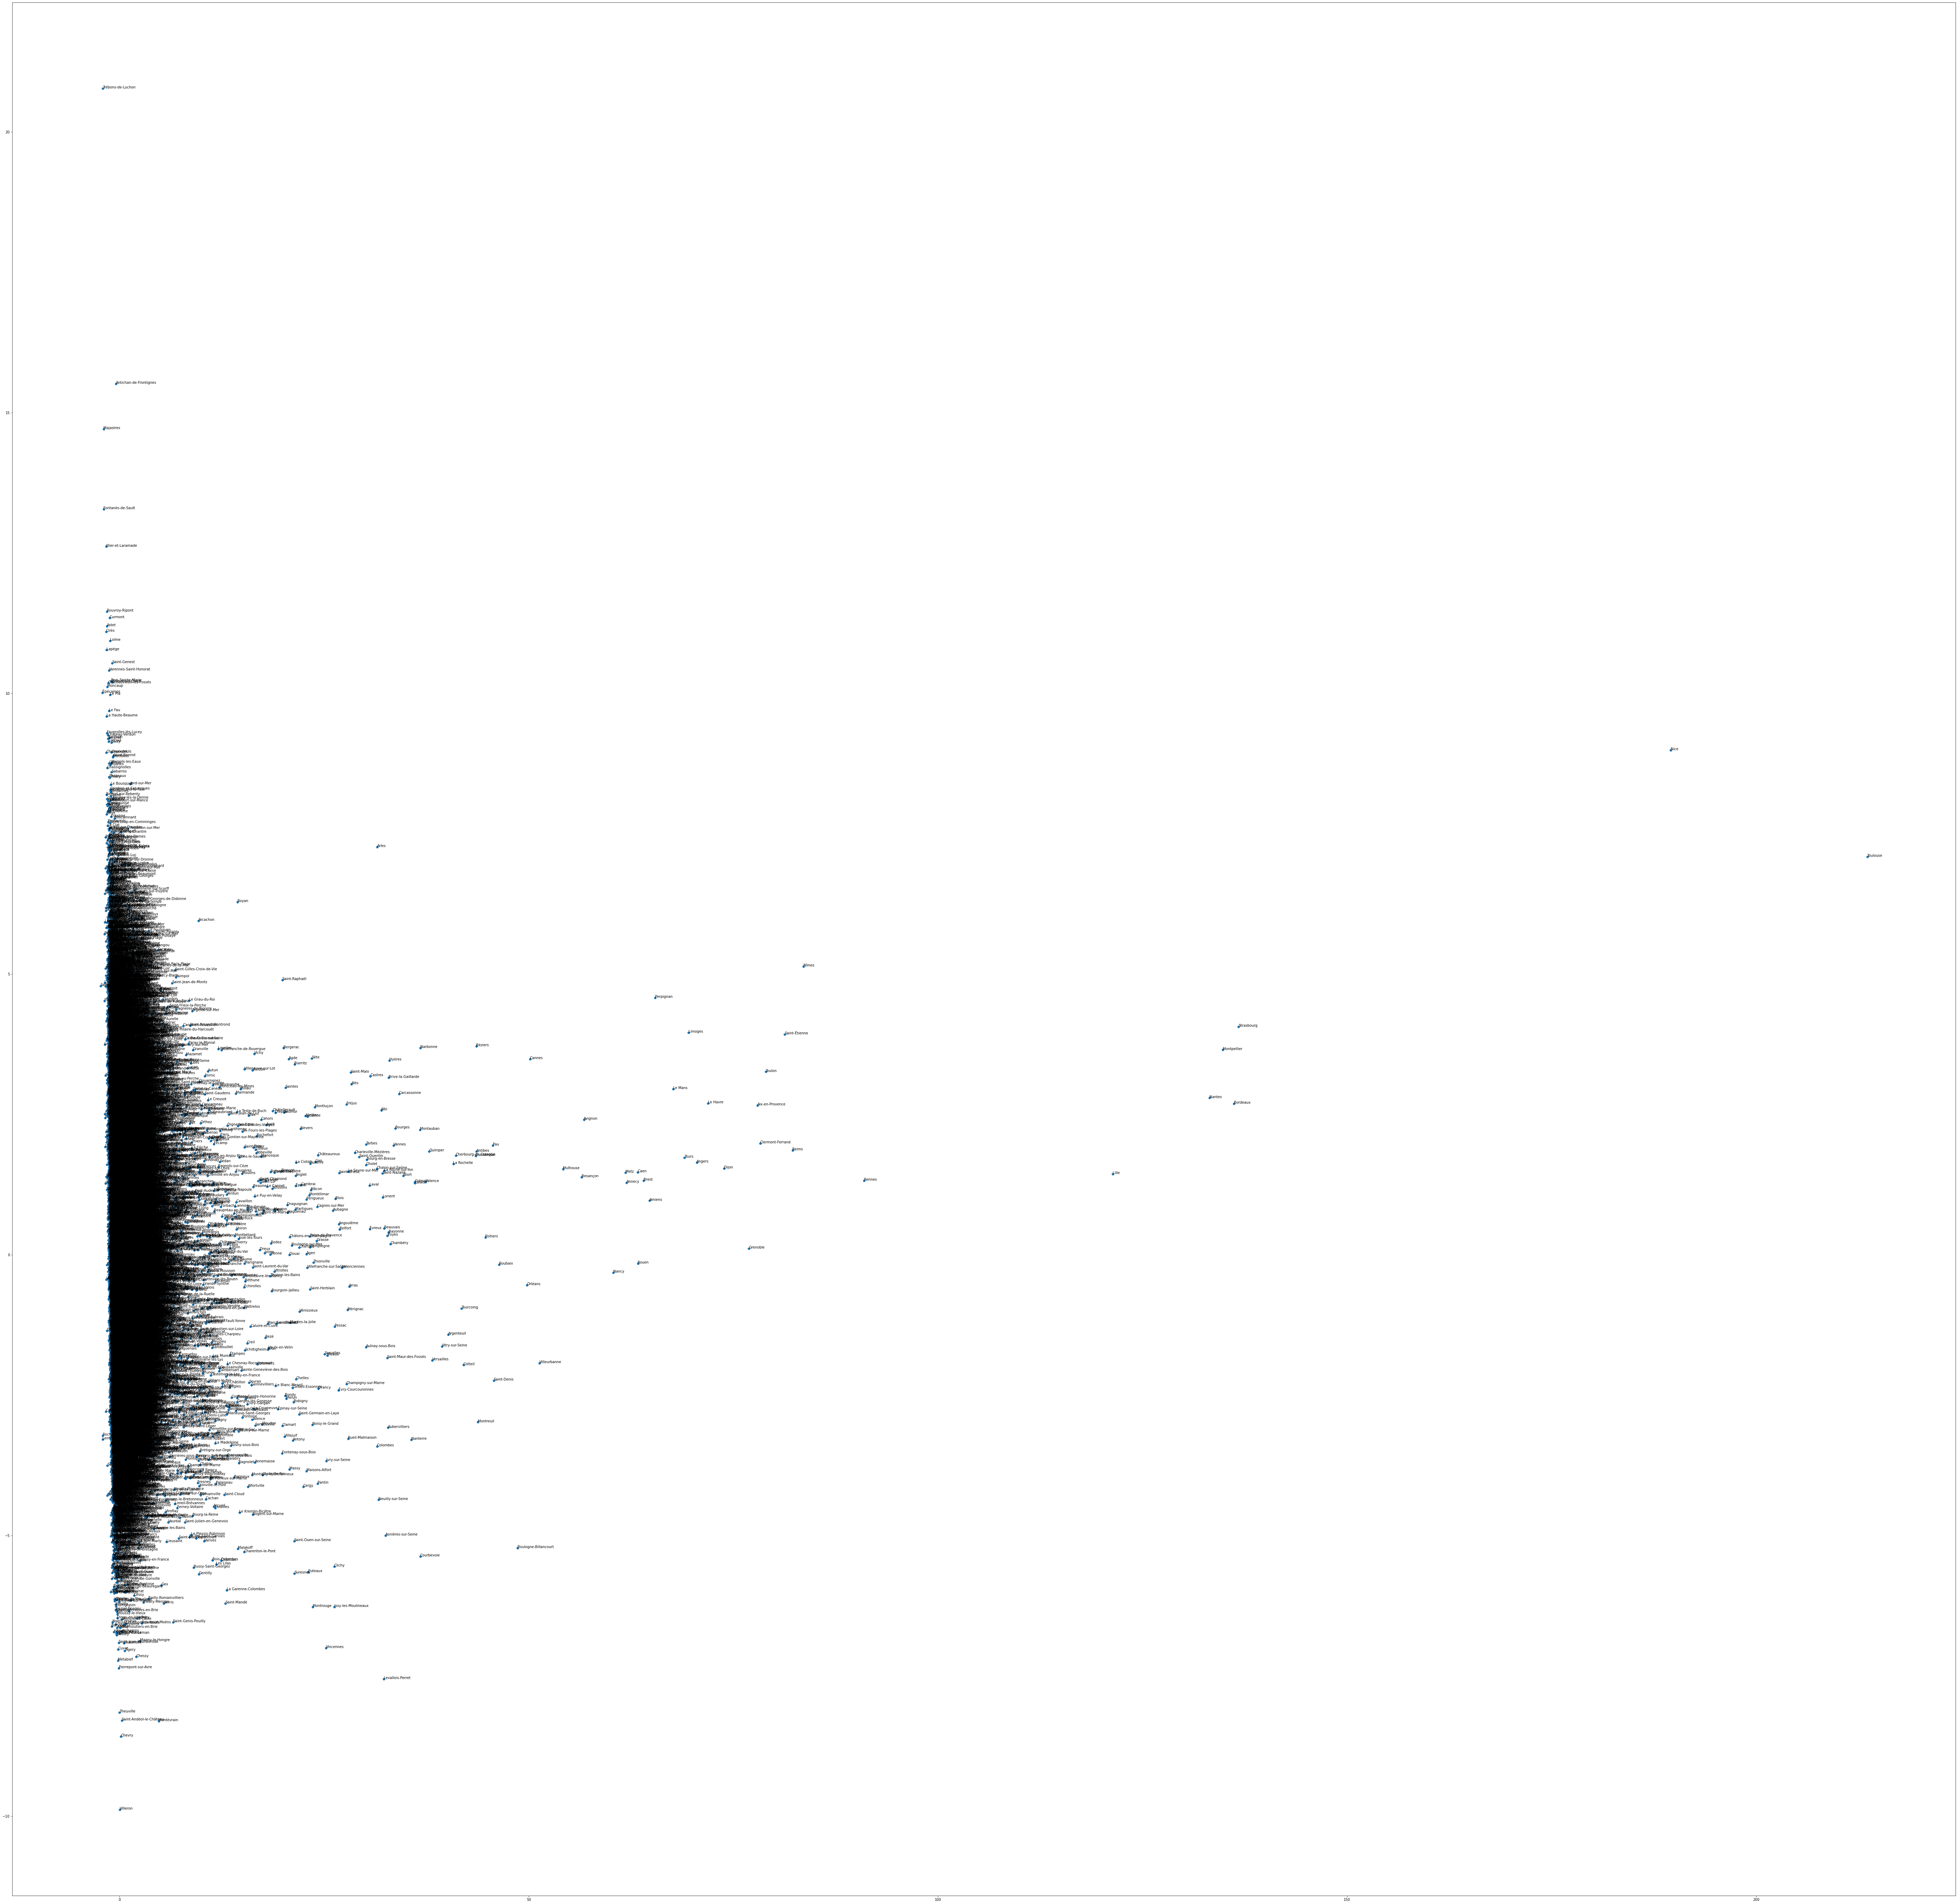

In [29]:
plt.figure(figsize=(100,100))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()